# IMPORT DATA

## Import new temp_data

In [30]:
import pandas as pd
temp_data = pd.read_csv('temp_data_new.csv')
temp_data = temp_data.drop(['Unnamed: 0'], axis=1)

In [31]:
print("data amount :",len(temp_data))
temp_data.head(5)

data amount : 188310


,time,temp,humid
0,1574985601,21,73.0
1,1574985604,21,73.0
2,1574985607,21,73.0
3,1574985611,21,73.0
4,1574985614,21,73.0


## Import new RTD_data

In [32]:
RTD_data = pd.read_csv('RTD_data_new.csv')
RTD_data = RTD_data.drop(['Unnamed: 0'], axis=1)

In [33]:
print("data amount :",len(RTD_data))
RTD_data.head(5)

data amount : 563120


,time,temp
0,1574985600,23
1,1574985602,23
2,1574985603,23
3,1574985604,23
4,1574985605,23


## Import new lux_data

In [34]:
lux_data = pd.read_csv('lux_data_new.csv')
lux_data = lux_data.drop(['Unnamed: 0'], axis=1)

In [35]:
print("data amount :",len(lux_data))
lux_data.head(5)

data amount : 707002


,time,lux
0,1574985600,487
1,1574985602,487
2,1574985603,487
3,1574985604,487
4,1574985605,488


## Merge

In [36]:
new = pd.merge(temp_data,RTD_data, on='time',how='inner')

In [37]:
len(new)

153360

In [38]:
new.head(5)

,time,temp_x,humid,temp_y
0,1574985604,21,73.0,23
1,1574985607,21,73.0,23
2,1574985614,21,73.0,23
3,1574985617,21,73.0,23
4,1574985622,21,73.0,23


In [39]:
merged_data = pd.merge(new,lux_data, on='time',how='inner')

In [40]:
len(merged_data)

146035

In [41]:
merged_data.head()

,time,temp_x,humid,temp_y,lux
0,1574985604,21,73.0,23,487
1,1574985607,21,73.0,23,488
2,1574985614,21,73.0,23,488
3,1574985622,21,73.0,23,488
4,1574985625,21,73.0,23,488


In [42]:
merged_data = merged_data.rename(columns={'temp_x':'temp'})
merged_data = merged_data.rename(columns={'temp_y':'RTD_temp'})

In [43]:
merged_data.head()

,time,temp,humid,RTD_temp,lux
0,1574985604,21,73.0,23,487
1,1574985607,21,73.0,23,488
2,1574985614,21,73.0,23,488
3,1574985622,21,73.0,23,488
4,1574985625,21,73.0,23,488


In [44]:
len(merged_data)

146035

In [45]:
merged_data.to_csv('all.csv')

# VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV

# Import latest data

In [234]:
import pandas as pd
all_data = pd.read_csv('all_new.csv')
all_data = all_data.drop(['Unnamed: 0'], axis=1)
all_data = all_data.iloc[:-1000,:]

print(len(all_data))
all_data.describe()

145014


,time,temp,humid,RTD_temp,lux
count,1.450140e+05,145014.000000,145014.000000,145014.000000,145014.000000
mean,1.575296e+09,23.669742,61.145945,25.456715,1900.840146
std,1.819022e+05,4.750889,11.371078,6.665100,4661.604841
min,1.574986e+09,18.000000,17.000000,20.000000,0.000000
25%,1.575138e+09,21.000000,57.000000,22.000000,0.000000
50%,1.575292e+09,22.000000,64.000000,23.000000,0.000000
75%,1.575455e+09,24.000000,69.000000,26.000000,1037.000000
max,1.575614e+09,47.000000,78.000000,55.000000,25311.000000


In [235]:
print(len(all_data.iloc[:,1:5]))
all_data.iloc[:,1:5].describe()

145014


,temp,humid,RTD_temp,lux
count,145014.000000,145014.000000,145014.000000,145014.000000
mean,23.669742,61.145945,25.456715,1900.840146
std,4.750889,11.371078,6.665100,4661.604841
min,18.000000,17.000000,20.000000,0.000000
25%,21.000000,57.000000,22.000000,0.000000
50%,22.000000,64.000000,23.000000,0.000000
75%,24.000000,69.000000,26.000000,1037.000000
max,47.000000,78.000000,55.000000,25311.000000


In [236]:
all_data.head(5)

,time,temp,humid,RTD_temp,lux
0,1574985604,21,73.0,23,487
1,1574985607,21,73.0,23,488
2,1574985614,21,73.0,23,488
3,1574985622,21,73.0,23,488
4,1574985625,21,73.0,23,488


In [237]:
all_data.tail(5)

,time,temp,humid,RTD_temp,lux
145009,1575614214,20,76.0,21,450
145010,1575614217,20,76.0,21,447
145011,1575614217,20,76.0,21,447
145012,1575614220,20,76.0,21,445
145013,1575614220,20,76.0,21,443


In [238]:
print(len(all_data))

145014


# PLOT

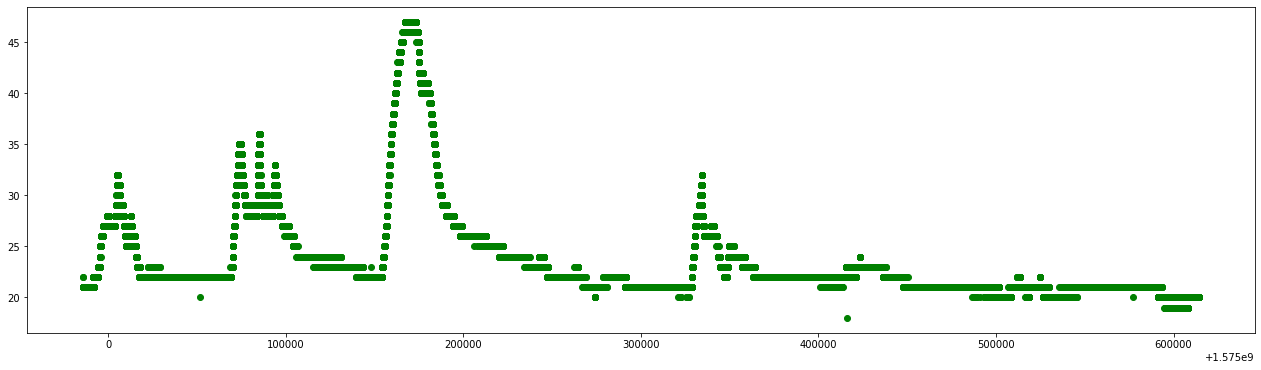

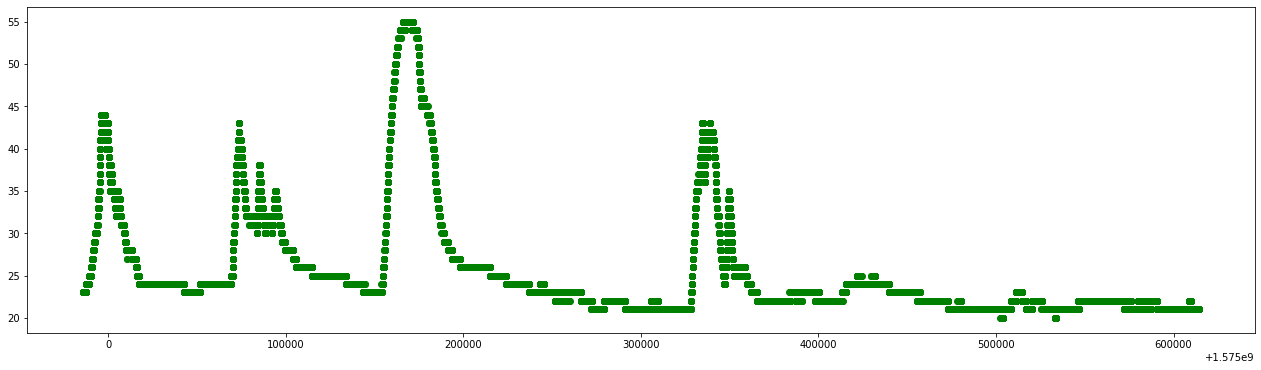

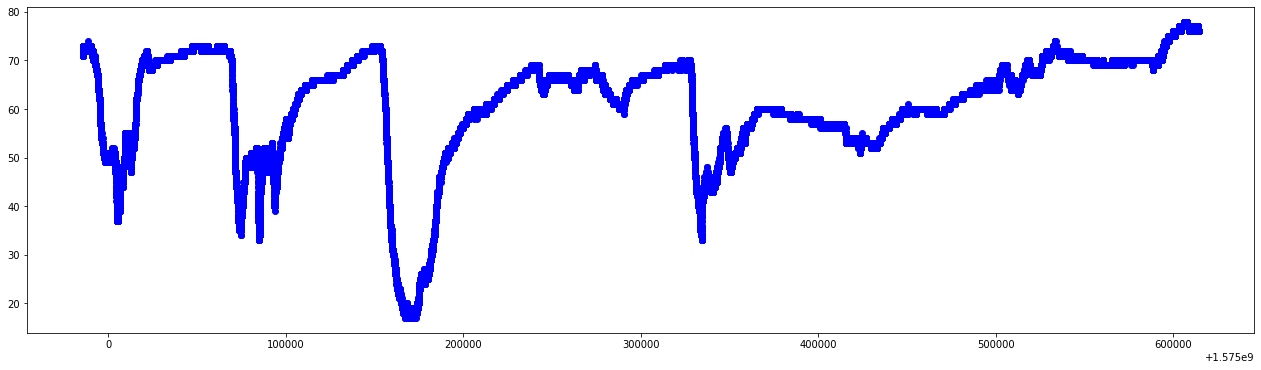

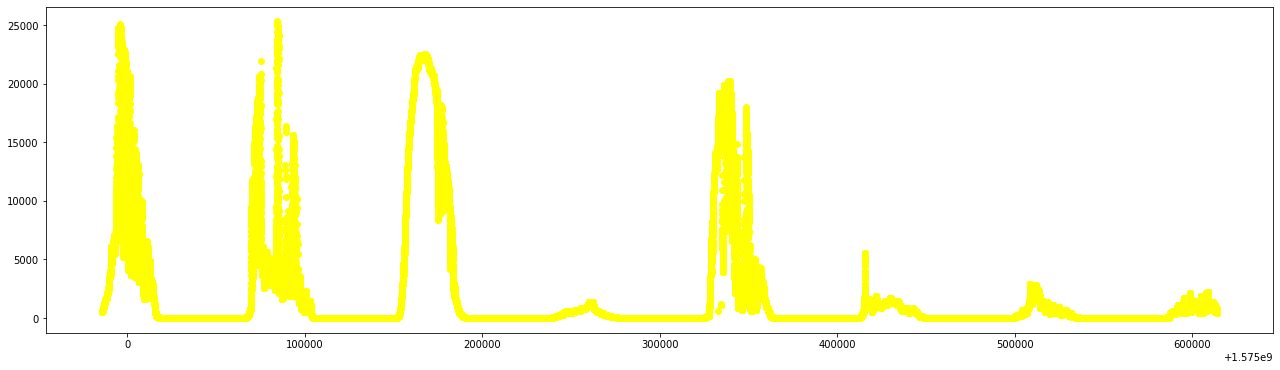

In [241]:
import matplotlib.pyplot as plt
import pandas as pd

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['temp'],color='green')

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['RTD_temp'],color='green')

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['humid'],color='blue')

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['lux'],color='yellow')

# plt.legend()
plt.show()

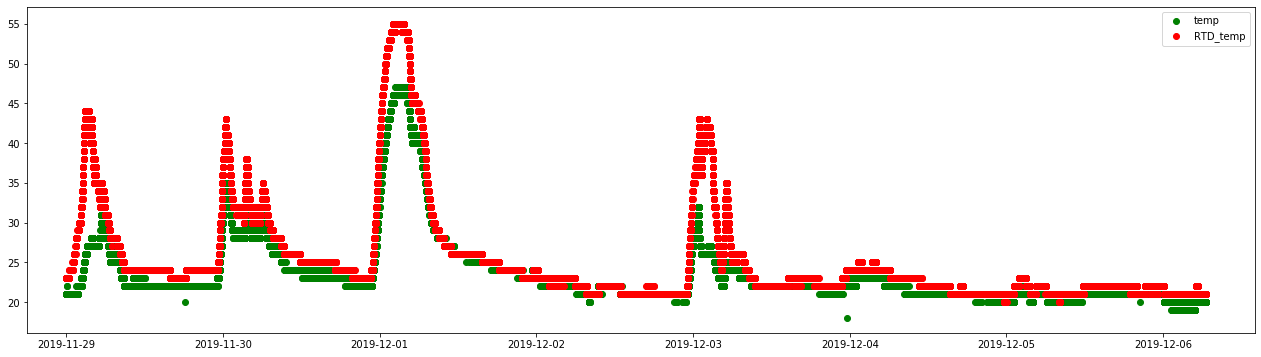

In [261]:
f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['temp'],color='green',label='temp')
plt.scatter(all_data['time'],all_data['RTD_temp'],color='red',label='RTD_temp')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

plt.legend()
plt.show()

In [243]:
all_data['time'].head()

0    1574985604
1    1574985607
2    1574985614
3    1574985622
4    1574985625
Name: time, dtype: int64

In [244]:
all_data['time'] = pd.to_datetime(all_data['time'], unit = 's')

In [245]:
all_data.head(10)

,time,temp,humid,RTD_temp,lux
0,2019-11-29 00:00:04,21,73.0,23,487
1,2019-11-29 00:00:07,21,73.0,23,488
2,2019-11-29 00:00:14,21,73.0,23,488
3,2019-11-29 00:00:22,21,73.0,23,488
4,2019-11-29 00:00:25,21,73.0,23,488
5,2019-11-29 00:00:28,21,73.0,23,488
6,2019-11-29 00:00:31,21,73.0,23,489
7,2019-11-29 00:00:38,21,73.0,23,490
8,2019-11-29 00:00:41,21,73.0,23,490
9,2019-11-29 00:00:44,21,73.0,23,491


(737391.75, 737399.5833333334)

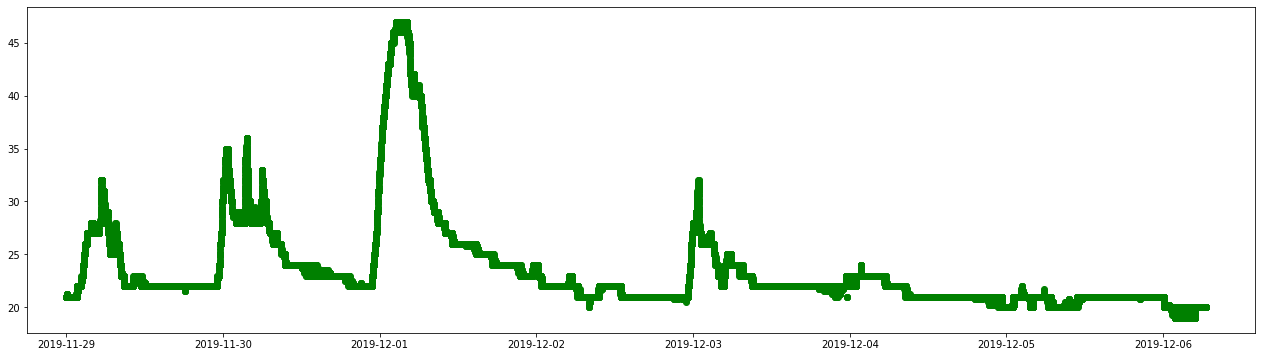

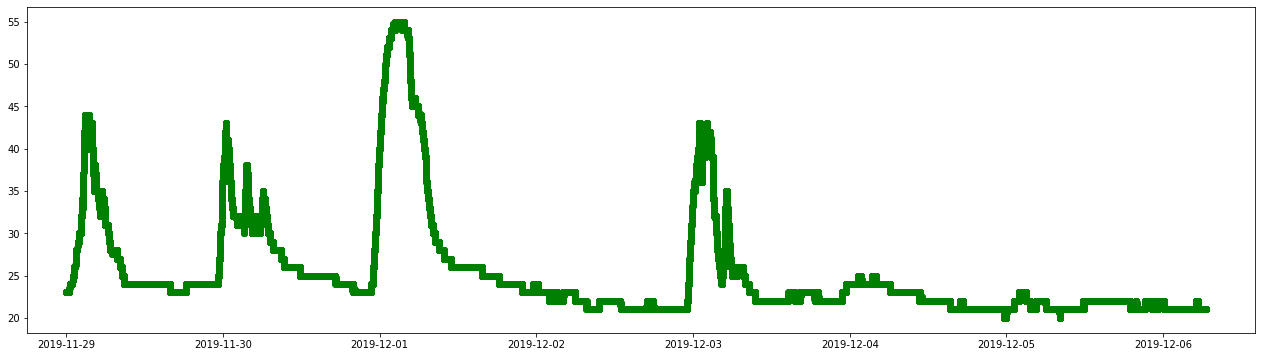

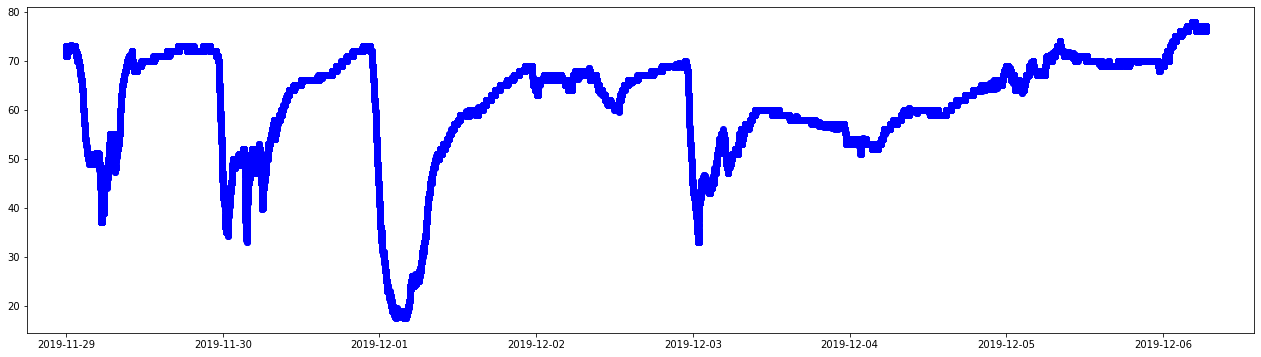

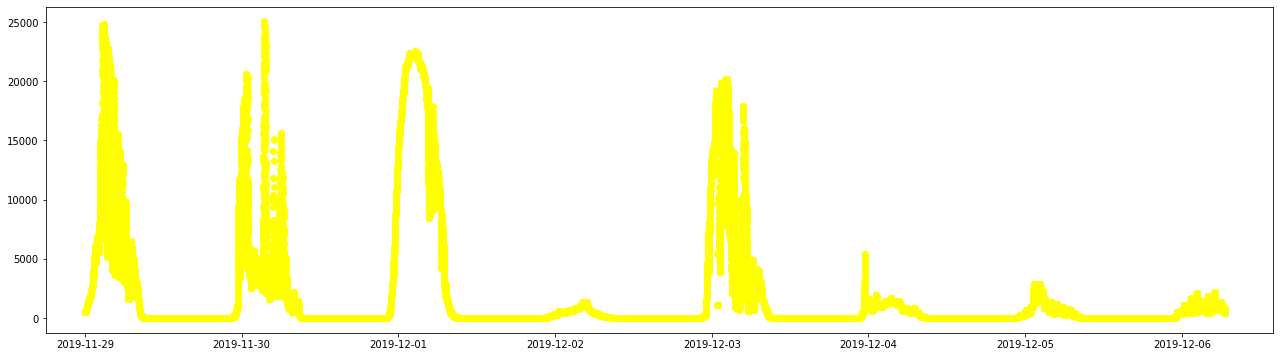

In [258]:
f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['temp_ma'],color='green')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['RTD_temp_ma'],color='green')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['humid_ma'],color='blue')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['lux_ma'],color='yellow')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

## moving average

In [247]:
all_data['temp_ma'] = all_data['temp'].rolling(window=4).mean()
all_data['humid_ma'] = all_data['humid'].rolling(window=4).mean()
all_data['RTD_temp_ma'] = all_data['RTD_temp'].rolling(window=4).mean()
all_data['lux_ma'] = all_data['lux'].rolling(window=4).mean()

In [248]:
all_data.head(6)

,time,temp,humid,RTD_temp,lux,temp_ma,humid_ma,RTD_temp_ma,lux_ma
0,2019-11-29 00:00:04,21,73.0,23,487,NaN,NaN,NaN,NaN
1,2019-11-29 00:00:07,21,73.0,23,488,NaN,NaN,NaN,NaN
2,2019-11-29 00:00:14,21,73.0,23,488,NaN,NaN,NaN,NaN
3,2019-11-29 00:00:22,21,73.0,23,488,21.0,73.0,23.0,487.75
4,2019-11-29 00:00:25,21,73.0,23,488,21.0,73.0,23.0,488.00
5,2019-11-29 00:00:28,21,73.0,23,488,21.0,73.0,23.0,488.00


(737391.75, 737399.5833333334)

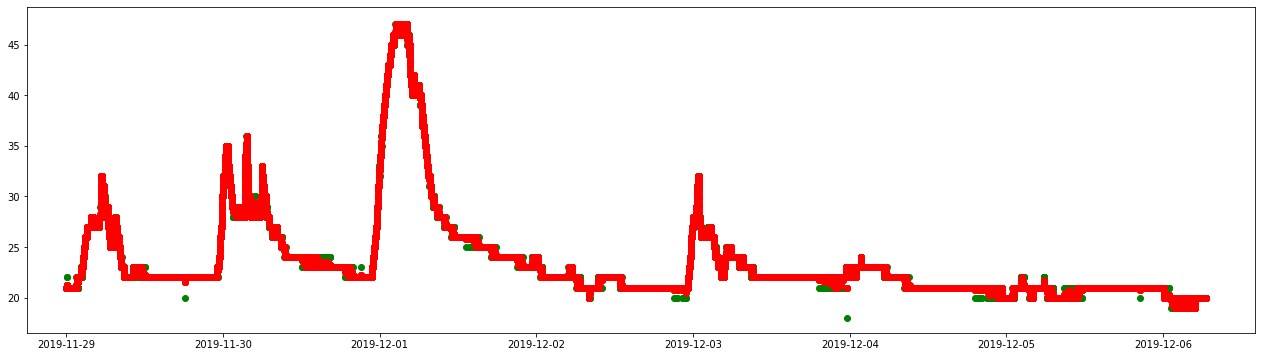

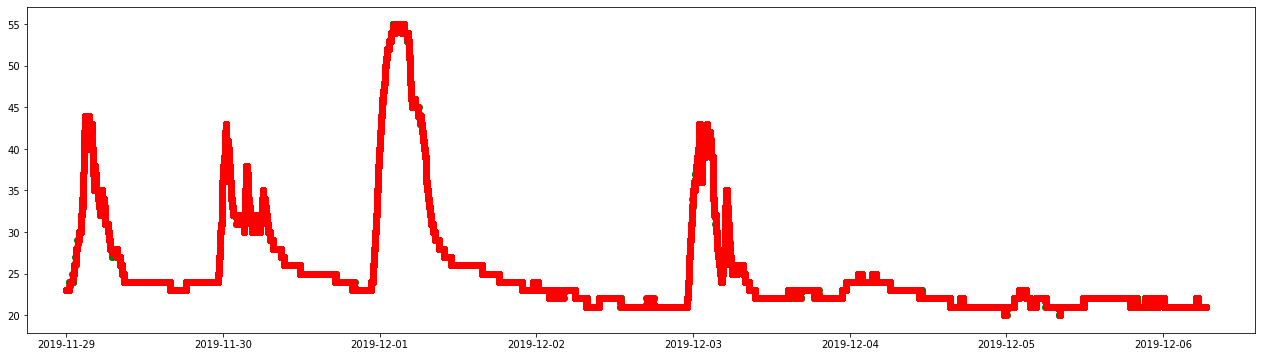

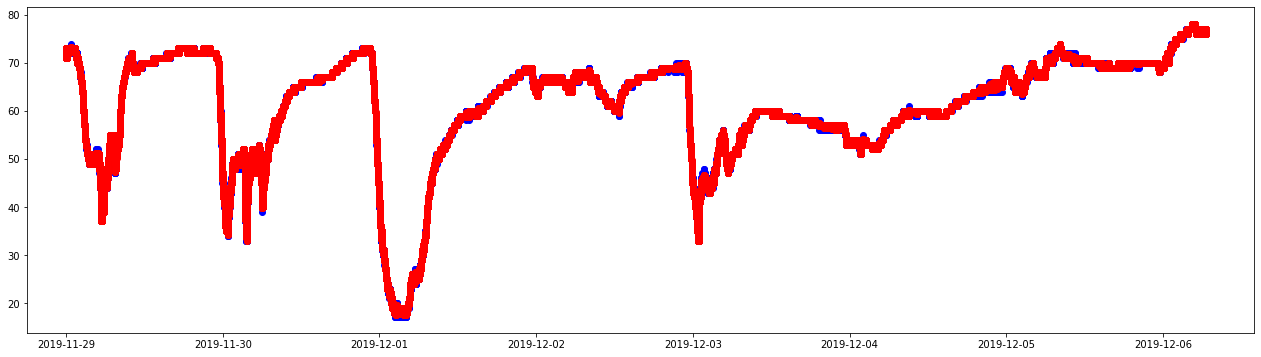

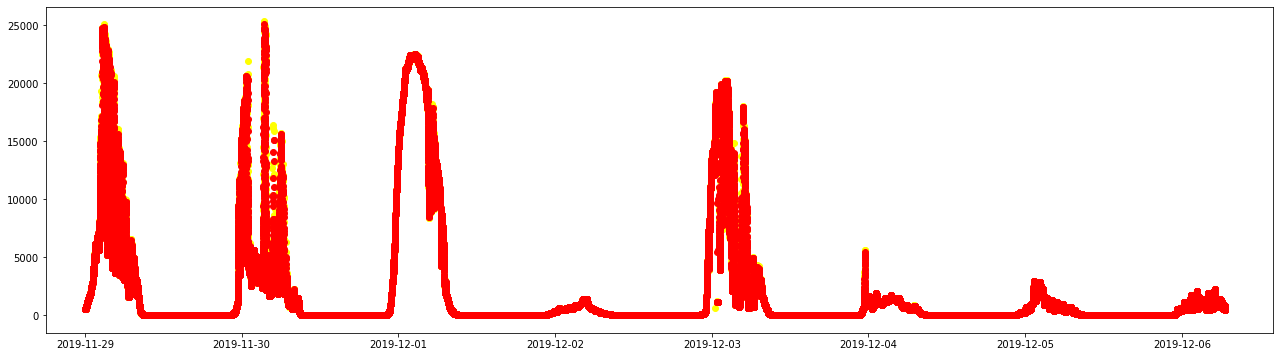

In [249]:
f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['temp'],color='green')
plt.scatter(all_data['time'],all_data['temp_ma'],color='red')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['RTD_temp'],color='green')
plt.scatter(all_data['time'],all_data['RTD_temp_ma'],color='red')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['humid'],color='blue')
plt.scatter(all_data['time'],all_data['humid_ma'],color='red')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['lux'],color='yellow')
plt.scatter(all_data['time'],all_data['lux_ma'],color='red')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

(737391.75, 737399.5833333334)

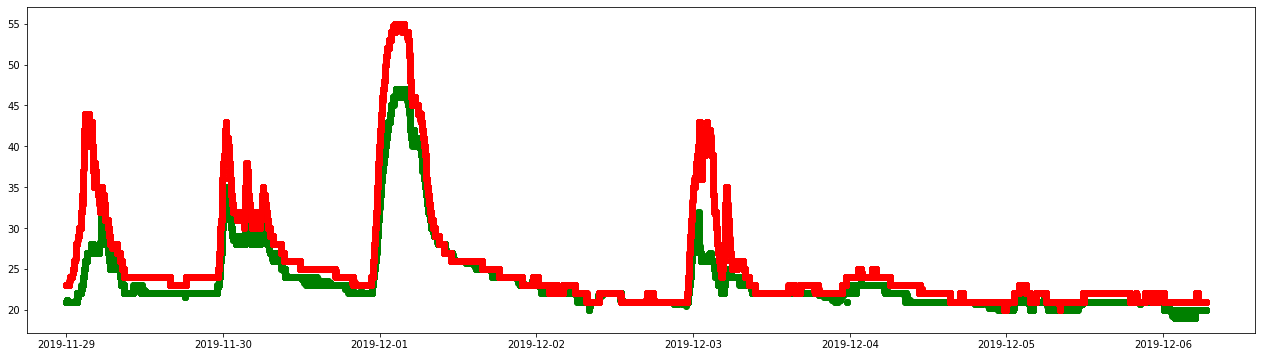

In [250]:
f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['temp_ma'],color='green')
plt.scatter(all_data['time'],all_data['RTD_temp_ma'],color='red')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

In [251]:
all_data.describe()

,temp,humid,RTD_temp,lux,temp_ma,humid_ma,RTD_temp_ma,lux_ma
count,145014.000000,145014.000000,145014.000000,145014.000000,145011.000000,145011.000000,145011.000000,145011.000000
mean,23.669742,61.145945,25.456715,1900.840146,23.669808,61.145668,25.456786,1900.869832
std,4.750889,11.371078,6.665100,4661.604841,4.748645,11.369430,6.664649,4652.924046
min,18.000000,17.000000,20.000000,0.000000,19.000000,17.500000,20.000000,0.000000
25%,21.000000,57.000000,22.000000,0.000000,21.000000,57.000000,22.000000,0.000000
50%,22.000000,64.000000,23.000000,0.000000,22.000000,64.500000,23.000000,0.000000
75%,24.000000,69.000000,26.000000,1037.000000,24.000000,69.000000,26.000000,1036.500000
max,47.000000,78.000000,55.000000,25311.000000,47.000000,78.000000,55.000000,25057.000000


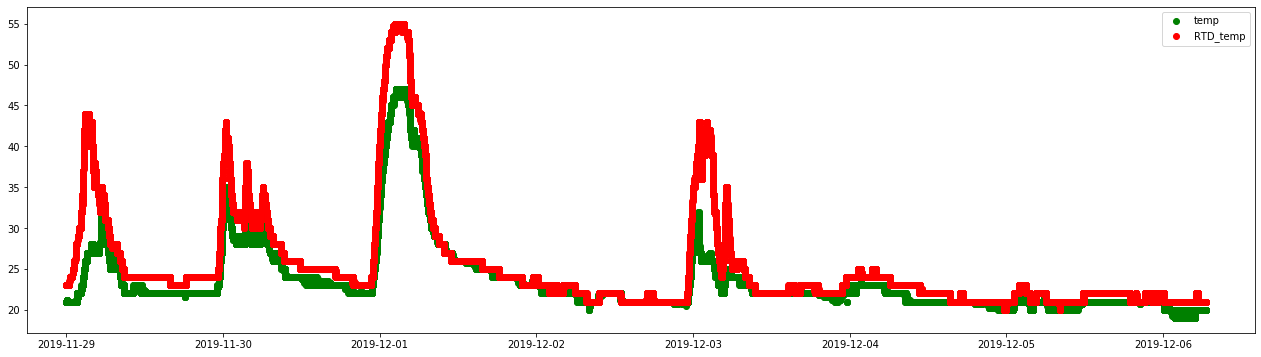

In [262]:
f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(all_data['time'],all_data['temp_ma'],color='green',label='temp')
plt.scatter(all_data['time'],all_data['RTD_temp_ma'],color='red',label='RTD_temp')
plt.xlim(['2019-11-28 18:00:00','2019-12-06 14:00:00'])

plt.legend()
plt.show()

Text(0, 0.5, 'values of temp_ma')

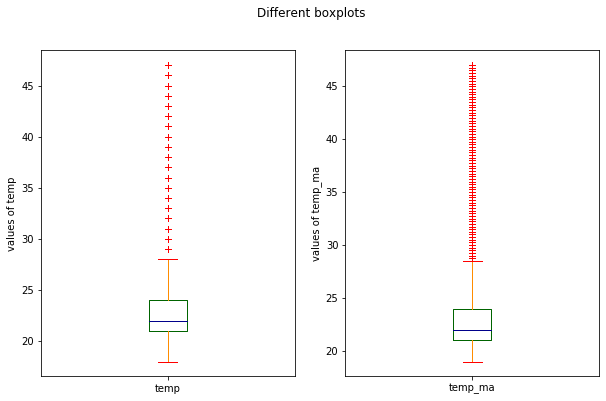

In [252]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')

all_data['temp'].plot(kind='box',ax=axes[0],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[0].set_ylabel('values of temp')
all_data['temp_ma'].plot(kind='box',ax=axes[1],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[1].set_ylabel('values of temp_ma')
# plt.subplots_adjust(wspace=1,hspace=1)

Text(0, 0.5, 'values of humid')

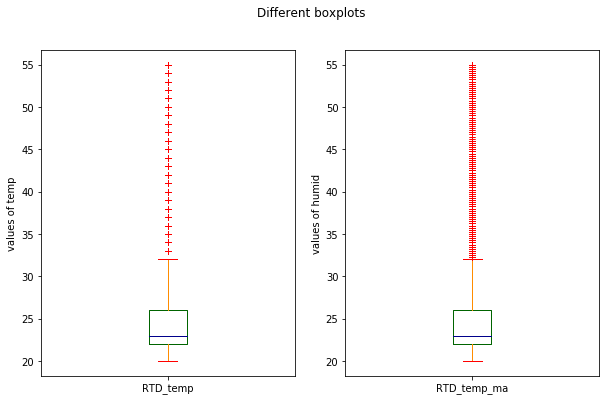

In [253]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')

all_data['RTD_temp'].plot(kind='box',ax=axes[0],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[0].set_ylabel('values of temp')
all_data['RTD_temp_ma'].plot(kind='box',ax=axes[1],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[1].set_ylabel('values of humid')
# plt.subplots_adjust(wspace=1,hspace=1)

Text(0, 0.5, 'values of humid')

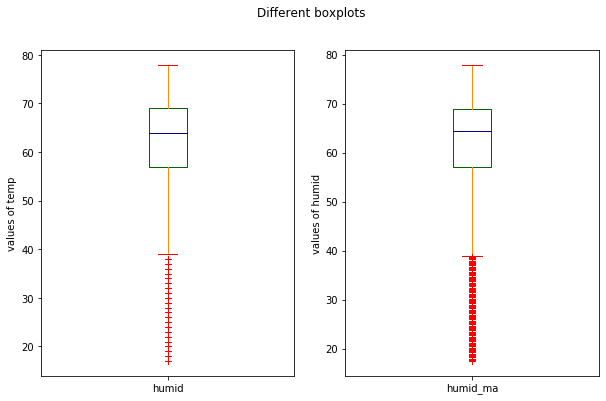

In [254]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')

all_data['humid'].plot(kind='box',ax=axes[0],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[0].set_ylabel('values of temp')
all_data['humid_ma'].plot(kind='box',ax=axes[1],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[1].set_ylabel('values of humid')
# plt.subplots_adjust(wspace=1,hspace=1)

Text(0, 0.5, 'values of humid')

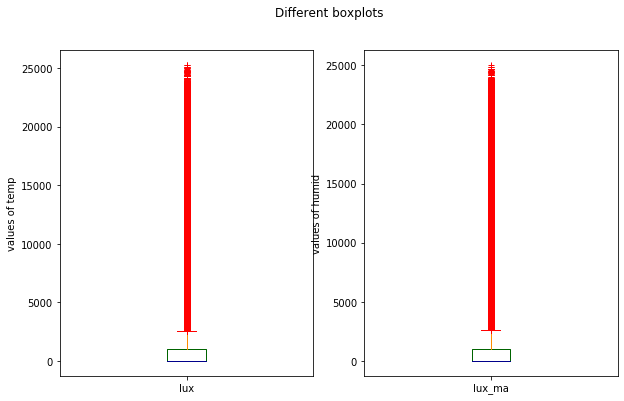

In [255]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')

all_data['lux'].plot(kind='box',ax=axes[0],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[0].set_ylabel('values of temp')
all_data['lux_ma'].plot(kind='box',ax=axes[1],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[1].set_ylabel('values of humid')
# plt.subplots_adjust(wspace=1,hspace=1)

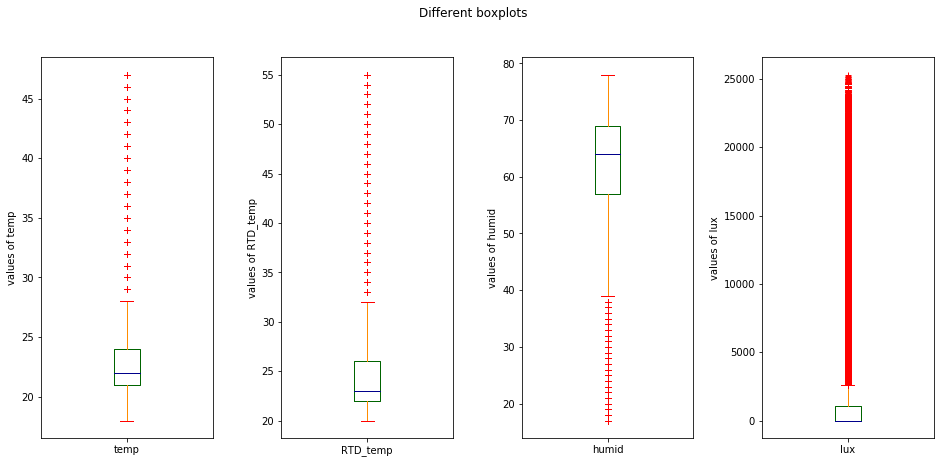

In [256]:
fig,axes = plt.subplots(1,4,figsize=(16,7))
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')

all_data['temp'].plot(kind='box',ax=axes[0],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[0].set_ylabel('values of temp')
all_data['RTD_temp'].plot(kind='box',ax=axes[1],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[1].set_ylabel('values of RTD_temp')
all_data['humid'].plot(kind='box',ax=axes[2],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[2].set_ylabel('values of humid')
all_data['lux'].plot(kind='box',ax=axes[3],subplots=True,title='Different boxplots',color=color,sym='r+')
axes[3].set_ylabel('values of lux')
plt.subplots_adjust(wspace=0.4)

In [257]:
n = all_data.iloc[:,1:]
n.head()

,temp,humid,RTD_temp,lux,temp_ma,humid_ma,RTD_temp_ma,lux_ma
0,21,73.0,23,487,NaN,NaN,NaN,NaN
1,21,73.0,23,488,NaN,NaN,NaN,NaN
2,21,73.0,23,488,NaN,NaN,NaN,NaN
3,21,73.0,23,488,21.0,73.0,23.0,487.75
4,21,73.0,23,488,21.0,73.0,23.0,488.00


In [240]:
corr = n.corr()
corr.style.background_gradient(cmap='GnBu')

,temp,humid,RTD_temp,lux
temp,1,-0.886426,0.940273,0.78223
humid,-0.886426,1,-0.862877,-0.747235
RTD_temp,0.940273,-0.862877,1,0.896872
lux,0.78223,-0.747235,0.896872,1


# 12/17VVVVVVVVVVVVVVVVVVVVVVVVVV 

In [476]:
import pandas as pd
all_data2 = pd.read_csv('all_new.csv')


all_data2 = all_data2.drop(['Unnamed: 0'], axis=1)
all_data2 = all_data2.iloc[:-800,:]

print(len(all_data))
all_data2.describe()

145214


,time,temp,humid,RTD_temp,lux
count,1.452140e+05,145214.000000,145214.000000,145214.000000,145214.000000
mean,1.575297e+09,23.664688,61.166726,25.450576,1899.127446
std,1.821601e+05,4.749567,11.377026,6.662559,4658.624795
min,1.574986e+09,18.000000,17.000000,20.000000,0.000000
25%,1.575138e+09,21.000000,57.000000,22.000000,0.000000
50%,1.575293e+09,22.000000,64.000000,23.000000,0.000000
75%,1.575455e+09,24.000000,69.000000,26.000000,1034.000000
max,1.575615e+09,47.000000,78.000000,55.000000,25311.000000


In [477]:
all_data2["curtain"] = 0

In [478]:
all_data2.head()

,time,temp,humid,RTD_temp,lux,curtain
0,1574985604,21,73.0,23,487,0
1,1574985607,21,73.0,23,488,0
2,1574985614,21,73.0,23,488,0
3,1574985622,21,73.0,23,488,0
4,1574985625,21,73.0,23,488,0


In [479]:
len(all_data2)

145214

# Curtain Up = 0, Down = 1

In [480]:
mask = all_data2["time"].between(1574951400,1575032400)

In [481]:
all_data2[mask].tail(3)

,time,temp,humid,RTD_temp,lux,curtain
10841,1575032375,22,70.0,24,0,0
10842,1575032392,22,70.0,24,0,0
10843,1575032398,22,70.0,24,0,0


In [482]:
all_data2.iloc[0:10843,-1] = 1

In [483]:
mask2 = all_data2["time"].between(1575280800,1575388800)

In [484]:
all_data2[mask2].head(3)

,time,temp,humid,RTD_temp,lux,curtain
69982,1575280800,22,64.0,22,0,0
69983,1575280806,22,64.0,22,0,0
69984,1575280809,21,63.0,22,0,0


In [485]:
all_data2[mask2].tail(3)

,time,temp,humid,RTD_temp,lux,curtain
94046,1575388793,22,58.0,22,0,0
94047,1575388796,22,58.0,22,0,0
94048,1575388799,22,58.0,22,0,0


In [486]:
all_data2.iloc[69982:94048,-1] = 1

In [491]:
# Plot

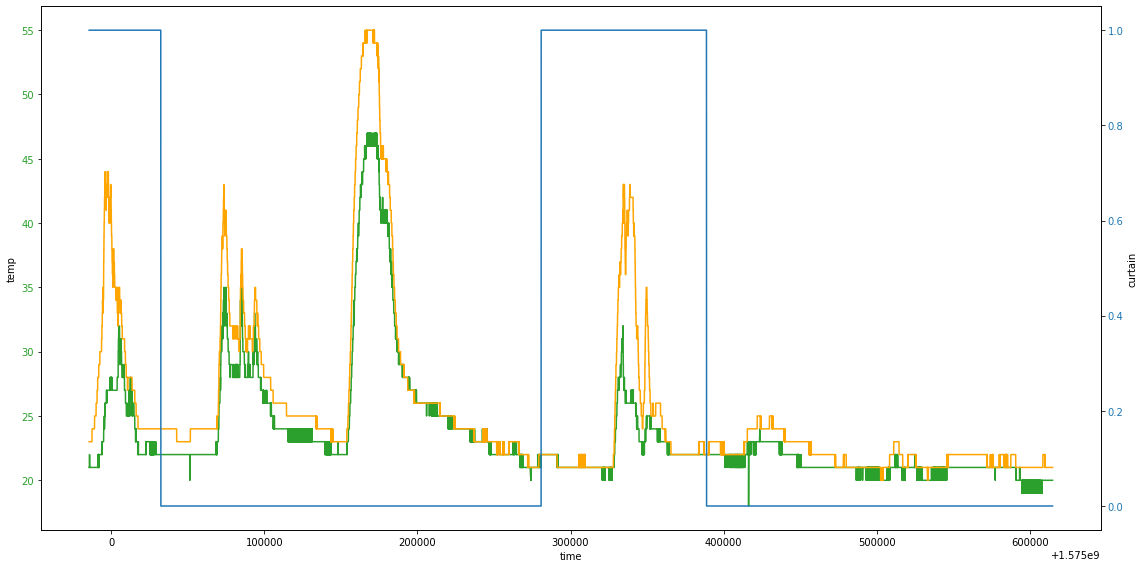

In [487]:
import numpy as np
import matplotlib.pyplot as plt
 
t = all_data2['time']
data1 = all_data2['temp']
data2 = all_data2['RTD_temp']
data3 = all_data2["curtain"]

fig, ax1 = plt.subplots(figsize = (16,8))

color = 'tab:green'
ax1.set_xlabel('time')

ax1.set_ylabel('temp')
ax1.plot(t, data1, color=color)
ax1.plot(t, data2, color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('curtain')  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Timestamp to Datatime

In [488]:
all_data2['time'] = pd.to_datetime(all_data2['time'], unit = 's')

# Moving Average Plot

In [489]:
all_data2['temp_ma'] = all_data2['temp'].rolling(window=4).mean()
all_data2['humid_ma'] = all_data2['humid'].rolling(window=4).mean()
all_data2['RTD_temp_ma'] = all_data2['RTD_temp'].rolling(window=4).mean()
all_data2['lux_ma'] = all_data2['lux'].rolling(window=4).mean()

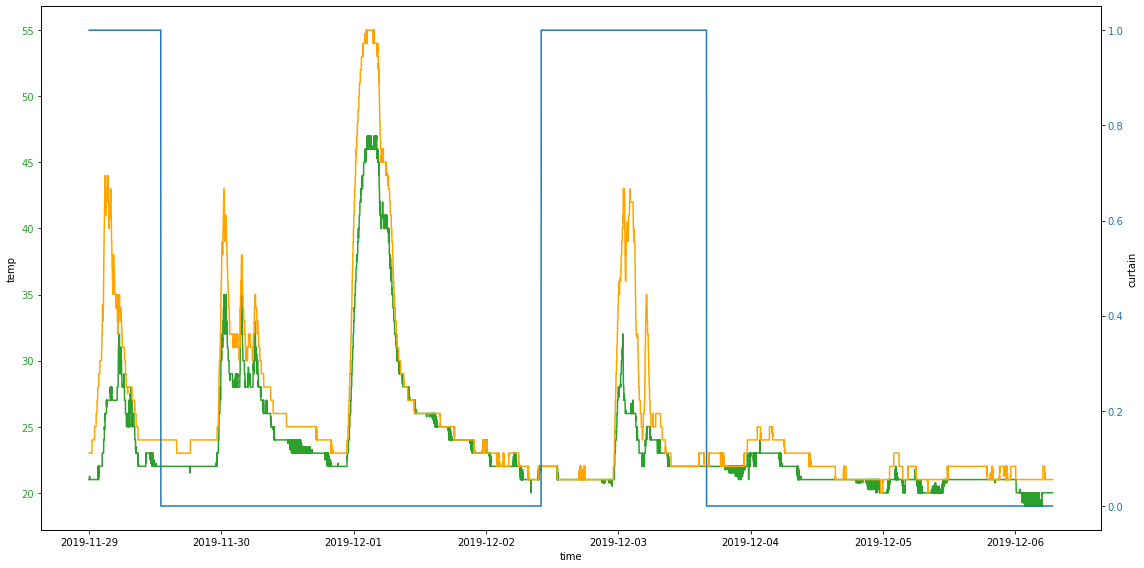

In [490]:
import numpy as np
import matplotlib.pyplot as plt
 
t = all_data2['time']
data1 = all_data2['temp_ma']
data2 = all_data2['RTD_temp_ma']
data3 = all_data2["curtain"]

fig, ax1 = plt.subplots(figsize = (16,8))

color = 'tab:green'
ax1.set_xlabel('time')

ax1.set_ylabel('temp')
ax1.plot(t, data1, color=color)
ax1.plot(t, data2, color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('curtain')  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


In [713]:
df = all_data2.diff(periods=10)

In [714]:
df.head(20)

,time,temp,humid,RTD_temp,lux,curtain,temp_ma,humid_ma,RTD_temp_ma,lux_ma
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [685]:
df.describe()

,time,temp,humid,RTD_temp,lux,curtain,temp_ma,humid_ma,RTD_temp_ma,lux_ma
count,145213,145213.000000,145213.000000,145213.000000,145213.000000,145213.000000,145210.000000,145210.000000,145210.000000,145210.000000
mean,0 days 00:00:04.333124,-0.000007,0.000028,-0.000014,0.001811,-0.000007,-0.000007,0.000028,-0.000014,0.001811
std,0 days 00:00:02.663592,0.238399,0.300630,0.126071,347.758680,0.004545,0.061073,0.085379,0.038512,180.853798
min,0 days 00:00:00,-4.000000,-2.000000,-1.000000,-17078.000000,-1.000000,-1.000000,-0.500000,-0.250000,-4366.000000
25%,0 days 00:00:03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0 days 00:00:03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0 days 00:00:06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0 days 00:06:56,4.000000,3.000000,1.000000,17842.000000,1.000000,1.000000,0.500000,0.250000,4462.500000


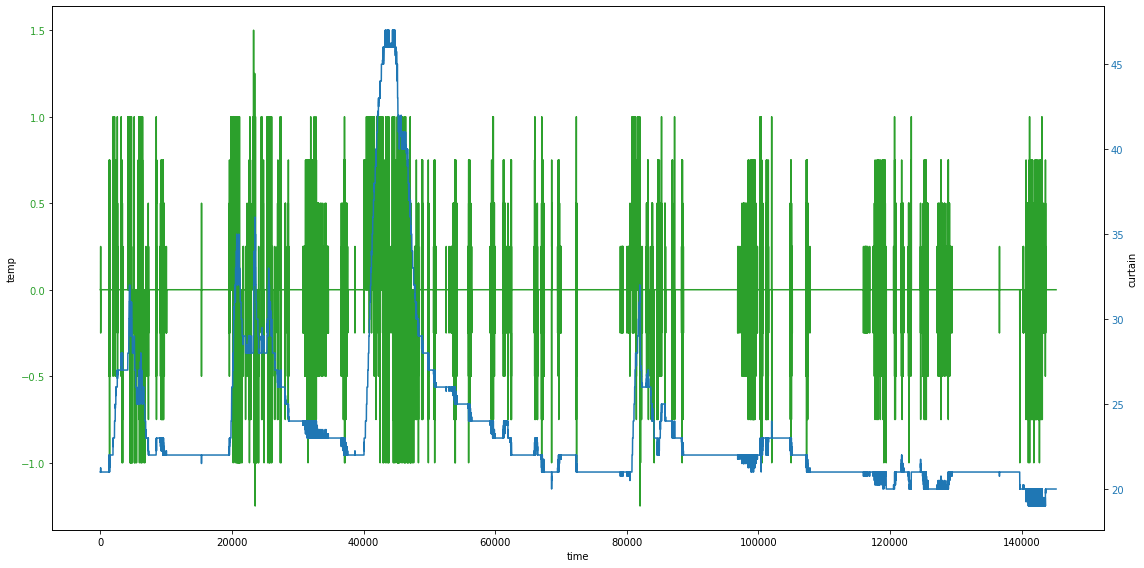

In [680]:
import numpy as np
import matplotlib.pyplot as plt
 
t = df.index
data1 = df['temp_ma']
data3 = all_data2["temp_ma"]

fig, ax1 = plt.subplots(figsize = (16,8))

color = 'tab:green'
ax1.set_xlabel('time')
ax1.set_ylabel('temp')
ax1.plot(t, data1, color=color)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('curtain')  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


In [554]:
over25 = all_data2[all_data2["RTD_temp_ma"] > 25]

In [555]:
print(len(over25))
over25.head()

36591


,time,temp,humid,RTD_temp,lux,curtain,temp_ma,humid_ma,RTD_temp_ma,lux_ma
1031,2019-11-29 01:15:23,21,73.0,26,3538,1,21.0,73.0,25.25,3511.75
1032,2019-11-29 01:15:29,21,73.0,26,3562,1,21.0,73.0,25.50,3529.25
1033,2019-11-29 01:15:32,21,73.0,26,3571,1,21.0,73.0,25.75,3545.75
1034,2019-11-29 01:15:35,21,73.0,26,3579,1,21.0,73.0,26.00,3562.50
1035,2019-11-29 01:15:43,21,73.0,26,3608,1,21.0,73.0,26.00,3580.00


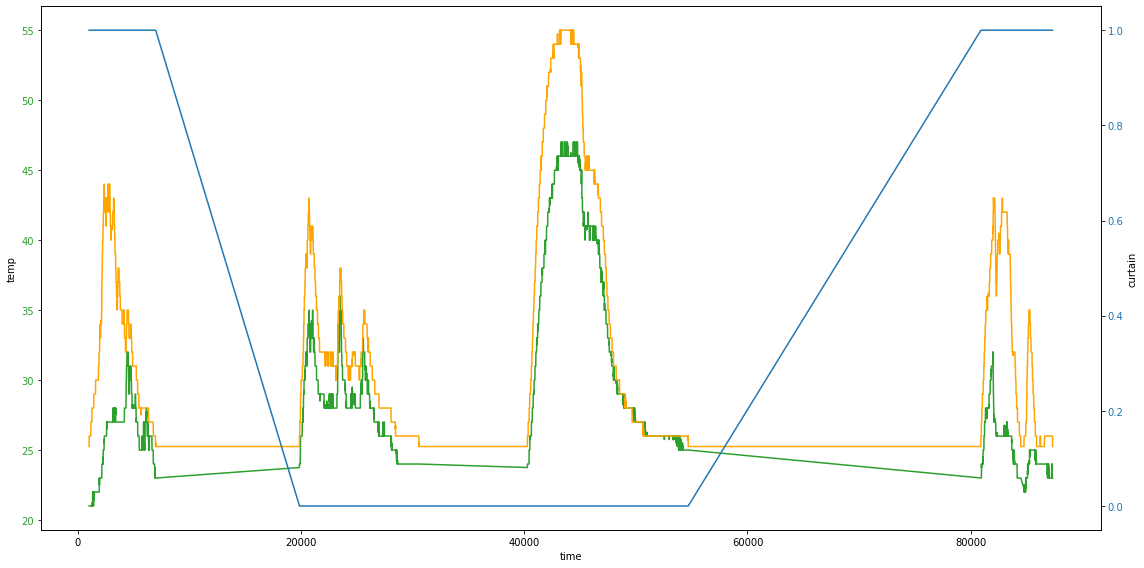

In [556]:
t = over25.index
data1 = over25['temp_ma']
data2 = over25['RTD_temp_ma']
data3 = over25["curtain"]

fig, ax1 = plt.subplots(figsize = (16,8))

color = 'tab:green'
ax1.set_xlabel('time')

ax1.set_ylabel('temp')
ax1.plot(t, data1, color=color)
ax1.plot(t, data2, color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('curtain')  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [659]:
part1 = over25.iloc[:5964,[6,8]]
len(part1)

5964

In [660]:
part2 = over25.iloc[5964:16682,[6,8]]
len(part2)

10718

In [661]:
part3 = over25.iloc[16682:31085,[6,8]]
len(part3)

14403

In [662]:
part4 = over25.iloc[31085:,[6,8]]
len(part4)

5506

In [663]:
down = pd.concat([part1, part4])

In [664]:
up = pd.concat([part2,part3])

In [665]:
corr_down = down.corr()
corr_down.style.background_gradient(cmap='GnBu')

,temp_ma,RTD_temp_ma
temp_ma,1,0.528387
RTD_temp_ma,0.528387,1


In [666]:
corr_up = up.corr()
corr_up.style.background_gradient(cmap='GnBu')

,temp_ma,RTD_temp_ma
temp_ma,1,0.98247
RTD_temp_ma,0.98247,1


In [667]:
down['res'] = down.iloc[:,1] - down.iloc[:,0]

In [669]:
down.describe()

,temp_ma,RTD_temp_ma,res
count,11470.000000,11470.000000,11470.000000
mean,25.646752,33.062860,7.416107
std,2.320177,5.717724,4.904720
min,21.000000,25.250000,0.000000
25%,24.000000,28.000000,3.000000
50%,26.000000,32.000000,7.000000
75%,27.000000,38.000000,11.000000
max,32.000000,44.000000,18.500000


In [671]:
up['res'] = up.iloc[:,1] - up.iloc[:,0]

In [672]:
up.describe()

,temp_ma,RTD_temp_ma,res
count,25121.000000,25121.000000,25121.000000
mean,31.189742,34.501174,3.311433
std,6.905108,9.456439,2.966238
min,23.750000,25.250000,-1.000000
25%,26.000000,27.000000,1.000000
50%,28.000000,31.000000,2.750000
75%,34.000000,40.000000,4.750000
max,47.000000,55.000000,10.000000


In [673]:
corr = part1.corr()
corr.style.background_gradient(cmap='GnBu')

,temp_ma,RTD_temp_ma
temp_ma,1,0.384953
RTD_temp_ma,0.384953,1


In [674]:
corr = part2.corr()
corr.style.background_gradient(cmap='GnBu')

,temp_ma,RTD_temp_ma
temp_ma,1,0.962352
RTD_temp_ma,0.962352,1


In [675]:
corr = part3.corr()
corr.style.background_gradient(cmap='GnBu')

,temp_ma,RTD_temp_ma
temp_ma,1,0.986931
RTD_temp_ma,0.986931,1


In [676]:
corr = part4.corr()
corr.style.background_gradient(cmap='GnBu')

,temp_ma,RTD_temp_ma
temp_ma,1,0.739928
RTD_temp_ma,0.739928,1


In [712]:
readings = [1,2,3,4,5,6,7,8,9,10]
reading = 10
max_samples = 10

def mean(nums):
    return float(sum(nums)) / max(len(nums), 1)

# readings.append(reading)
avg = mean(readings)

print('current average =', avg)
print('readings used for average:', readings)

if len(readings) == max_samples:
    readings.pop(0)

print('readings saved for next time:', readings)

current average = 5.5
readings used for average: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
readings saved for next time: [2, 3, 4, 5, 6, 7, 8, 9, 10]
